<a href="https://colab.research.google.com/github/AtharvaKawadkar/Telco_Customer_Churn/blob/main/Telco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df  = pd.read_csv("/content/Telco_Customer_Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


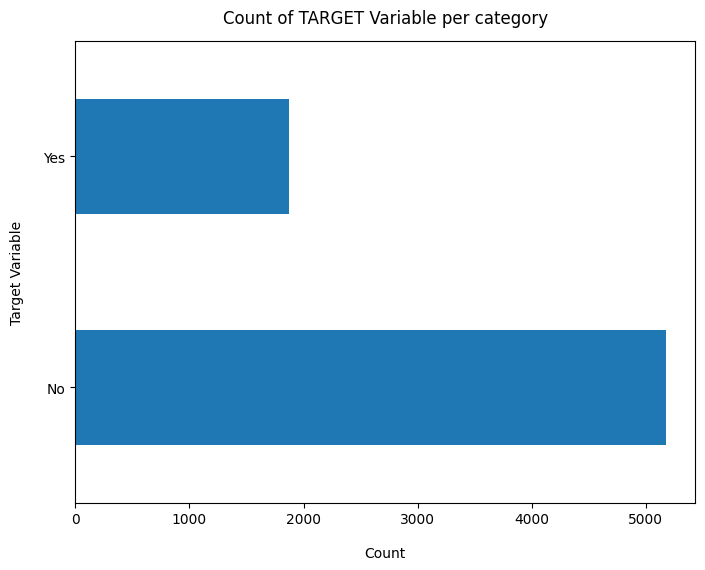

In [ ]:
df['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [ ]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
#Removing missing values
df.dropna(how = 'any', inplace = True)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
#drop column customerID and tenure
df.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


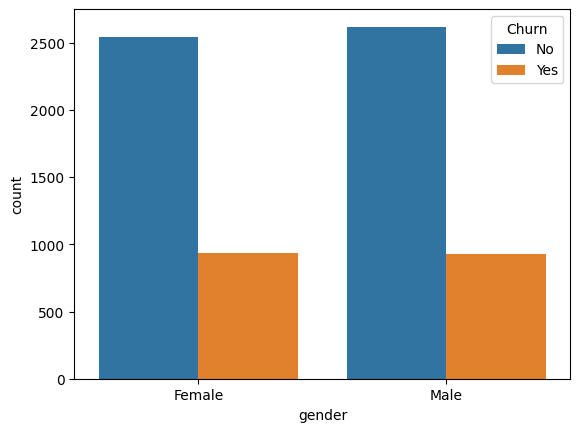

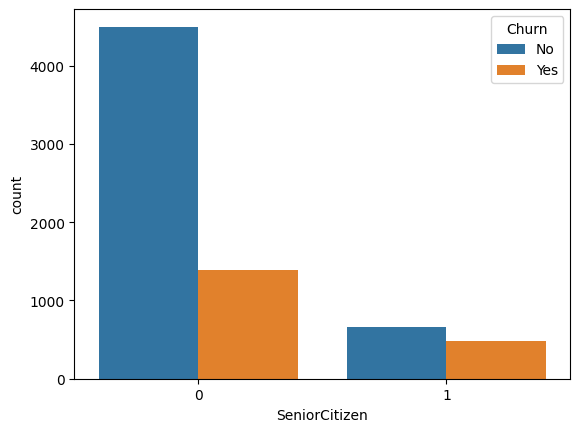

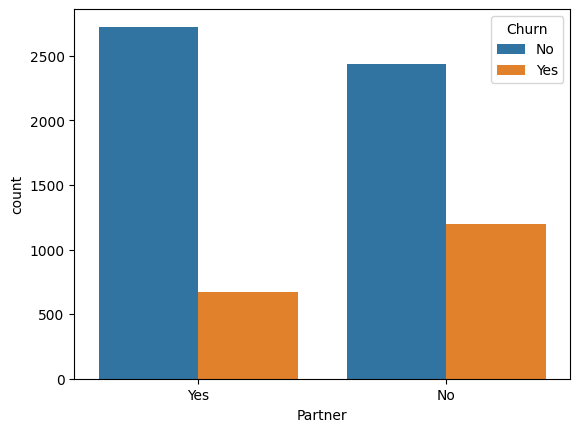

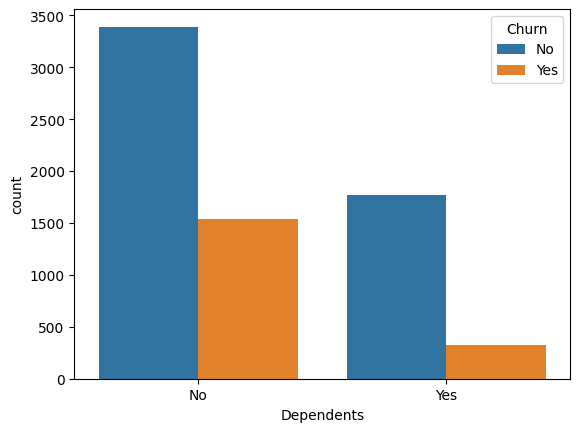

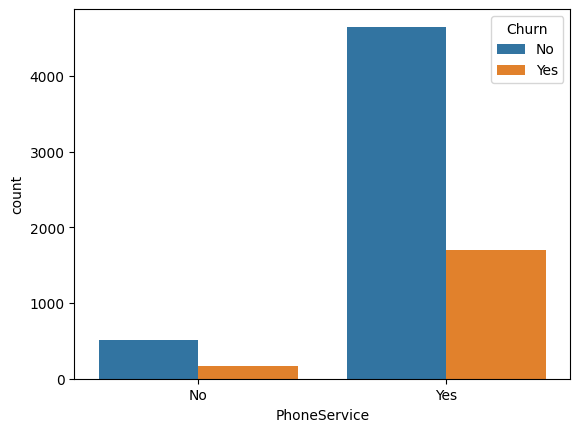

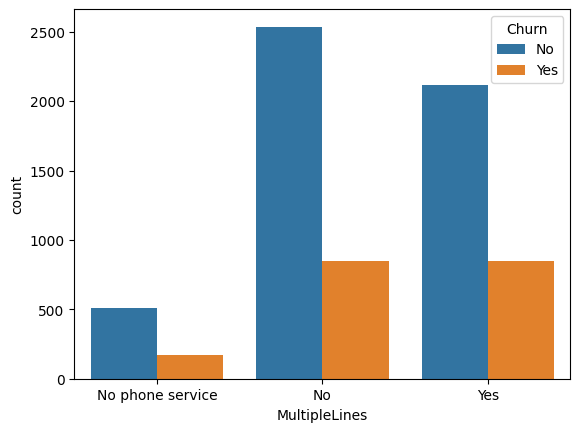

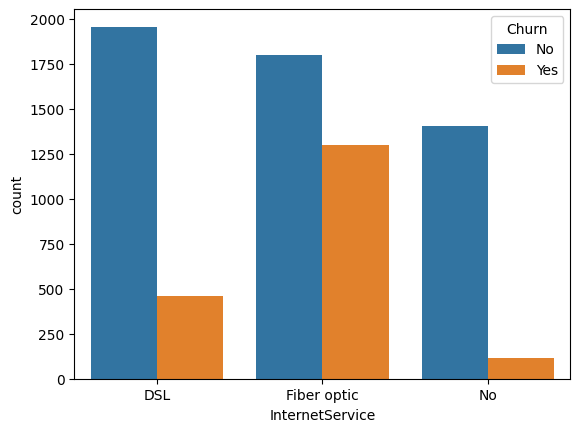

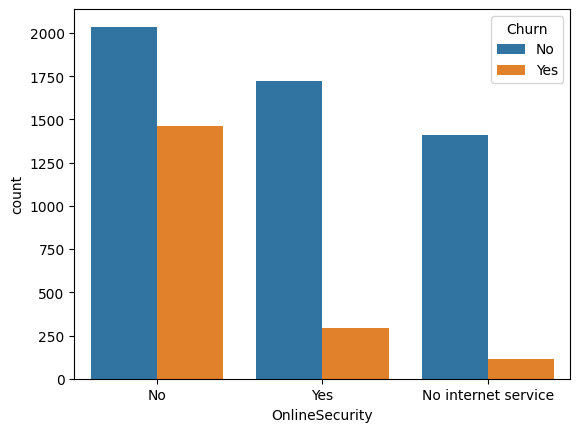

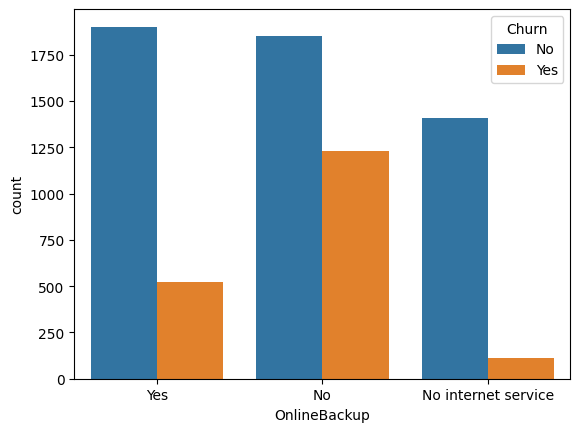

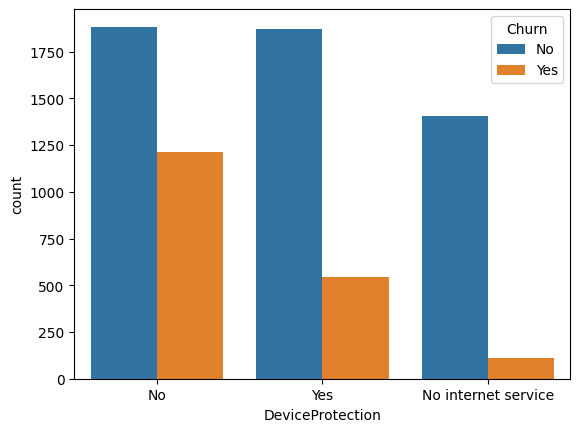

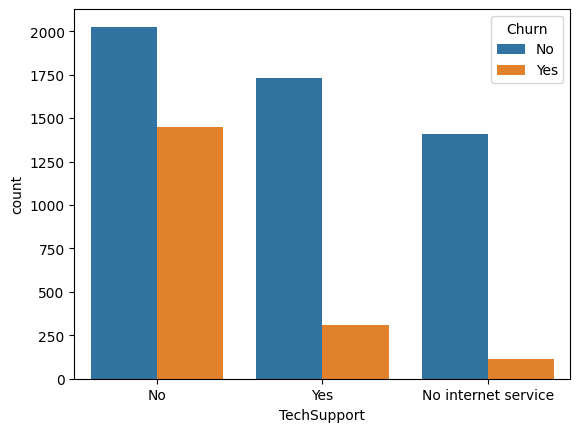

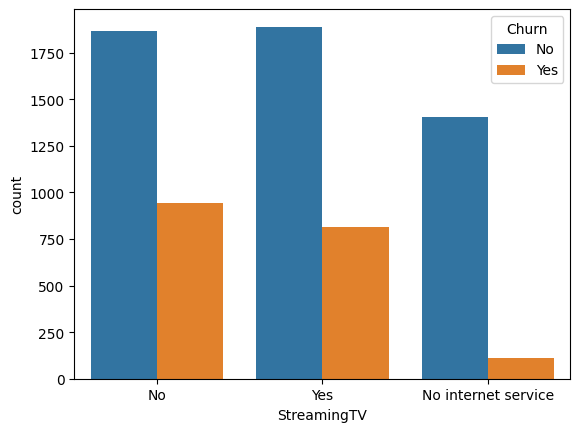

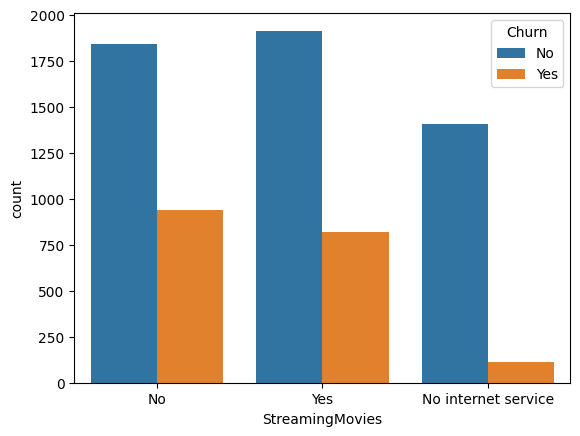

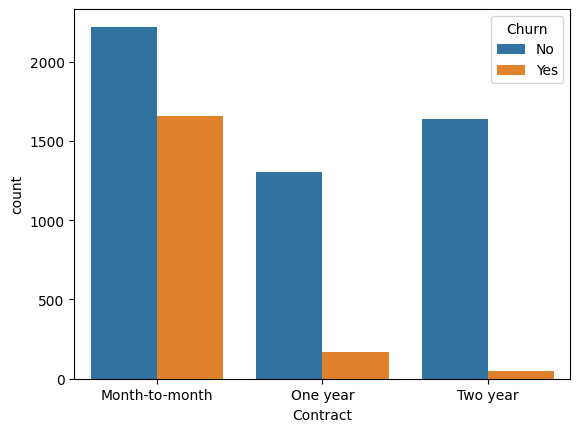

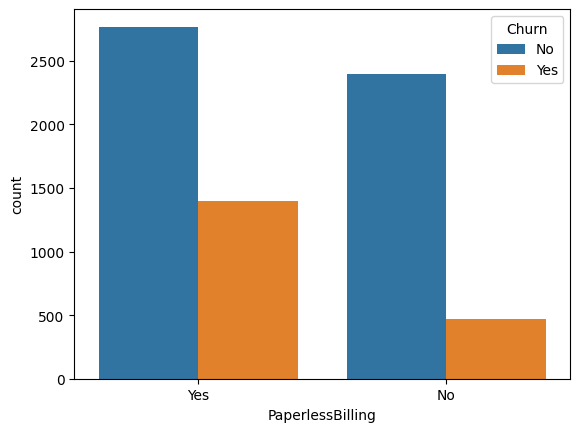

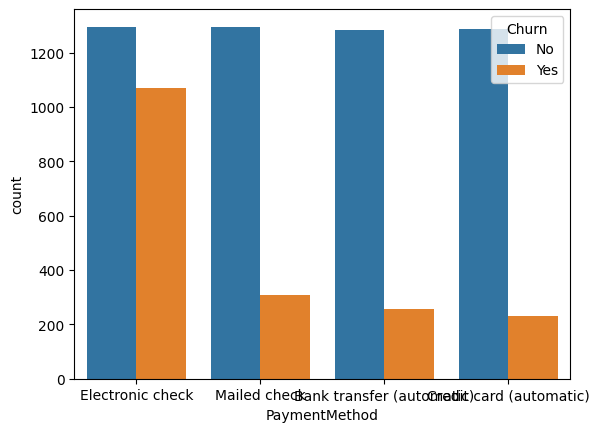

In [ ]:
for i, predictor in enumerate(df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Churn')

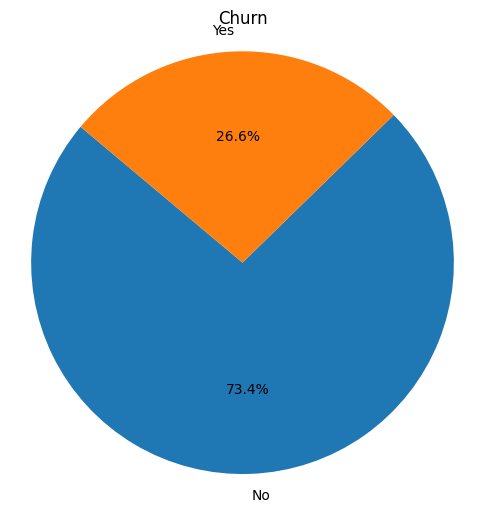

In [ ]:
# Pie Chart for Churn
category_counts = df['Churn'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Churn')
plt.axis('equal')
plt.show()

In [ ]:
df.replace(('Female', 'Male'), (0, 1), inplace=True)
df.replace(('No', 'Yes', 'No phone service'), (0, 1, 2), inplace=True)
df.replace(('No', 'DSL', 'Fiber optic'), (0, 1, 2), inplace=True)
df.replace(('Month-to-month', 'One year', 'Two year'), (0, 1, 2), inplace=True)
df.replace(('No internet service'), (3), inplace=True)
df.replace(('Electronic check', 'Mailed check', 'Bank transfer (automatic)','Credit card (automatic)'), (0, 1, 2,3), inplace=True)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,2,1,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,1,0,0,0,1,0,1,1,0,1,0,0,0,1,0,1,56.95,1889.50,0
2,1,0,0,0,1,0,1,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,1,0,0,0,0,2,1,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,0,0,0,0,1,0,2,0,0,0,0,0,0,0,1,0,70.70,151.65,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   PhoneService      7032 non-null   int64  
 5   MultipleLines     7032 non-null   int64  
 6   InternetService   7032 non-null   int64  
 7   OnlineSecurity    7032 non-null   int64  
 8   OnlineBackup      7032 non-null   int64  
 9   DeviceProtection  7032 non-null   int64  
 10  TechSupport       7032 non-null   int64  
 11  StreamingTV       7032 non-null   int64  
 12  StreamingMovies   7032 non-null   int64  
 13  Contract          7032 non-null   int64  
 14  PaperlessBilling  7032 non-null   int64  
 15  PaymentMethod     7032 non-null   int64  
 16  MonthlyCharges    7032 non-null   float64


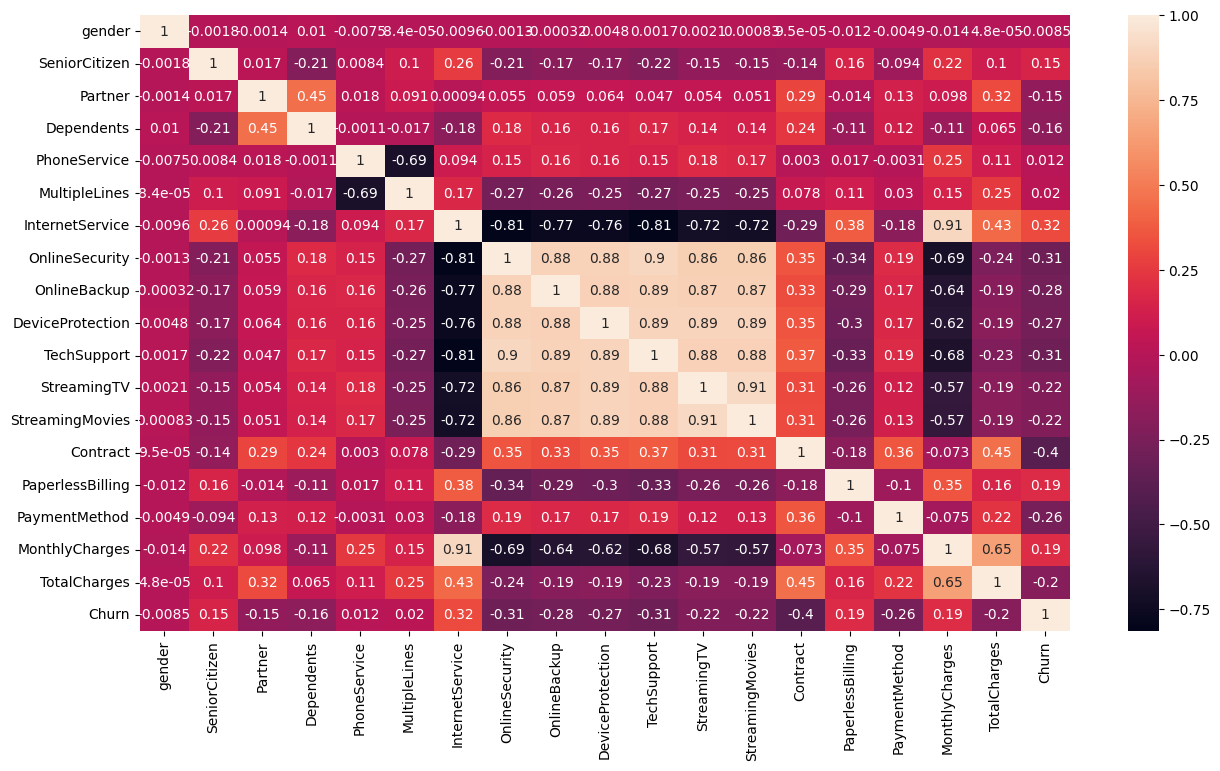

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [ ]:
corrmap = df.corr()

In [ ]:
df.corrwith(df["Churn"])

gender             -0.008545
SeniorCitizen       0.150541
Partner            -0.149982
Dependents         -0.163128
PhoneService        0.011691
MultipleLines       0.019609
InternetService     0.316350
OnlineSecurity     -0.307644
OnlineBackup       -0.280405
DeviceProtection   -0.273575
TechSupport        -0.305685
StreamingTV        -0.222682
StreamingMovies    -0.224046
Contract           -0.396150
PaperlessBilling    0.191454
PaymentMethod      -0.262918
MonthlyCharges      0.192858
TotalCharges       -0.199484
Churn               1.000000
dtype: float64

In [ ]:
def get_correlated_col(cor_dat, threshold):
    feature = []
    value = []

    for i, index in enumerate(cor_dat.index):
        if abs(cor_dat[index]) < threshold:
            feature.append(index)
            value.append(cor_dat[index])

    data = pd.DataFrame(data=value, index=feature, columns=['corr_value'])
    return data

# Calculate the correlated columns and store them in top_corelated_values
top_corelated_values = get_correlated_col(corrmap['Churn'], 0.2)

# Extract the feature names from top_corelated_values (index)
selected_features = top_corelated_values.index.tolist()

# Select those features from the original DataFrame df
X = df[selected_features]

# Define the target variable
y = df['Churn']

In [ ]:
X

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,PaperlessBilling,MonthlyCharges,TotalCharges
0,0,0,1,0,0,2,1,29.85,29.85
1,1,0,0,0,1,0,0,56.95,1889.50
2,1,0,0,0,1,0,1,53.85,108.15
3,1,0,0,0,0,2,0,42.30,1840.75
4,0,0,0,0,1,0,1,70.70,151.65
...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,1,1,84.80,1990.50
7039,0,0,1,1,1,1,1,103.20,7362.90
7040,0,0,1,1,0,2,1,29.60,346.45
7041,1,1,1,0,1,1,1,74.40,306.60


In [ ]:
# splitting a dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y ,test_size=.2,random_state=42)

In [ ]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

In [ ]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

#Logistic Regression with specific parameters
logistic_clf = LogisticRegression(
    penalty='l2',  # Regularization type (l2 for Ridge, l1 for Lasso)
    C=1.0,         # Inverse of regularization strength (smaller values increase regularization)
    solver='lbfgs',  # Solver for optimization (used 'lbfgs' here, but you can choose other solvers)
    random_state=100  # Seed for reproducibility
)

In [ ]:
#train the classifier
logistic_clf.fit(X_resampled, y_resampled)

LogisticRegression(random_state=100)

In [ ]:
#make predictions
logistic_predict = logistic_clf.predict(xr_test)

In [ ]:
log_accuracy = accuracy_score(logistic_predict, yr_test)

In [ ]:
print(classification_report(yr_test, logistic_predict, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       413
           1       0.89      0.90      0.90       496

    accuracy                           0.89       909
   macro avg       0.89      0.89      0.89       909
weighted avg       0.89      0.89      0.89       909



Knn

In [ ]:
# Create a KNeighborsClassifier model with specific parameters
knn_clf = KNeighborsClassifier(
    n_neighbors=5,  # Number of neighbors to consider
    weights='uniform',  # Weighting scheme ('uniform' assigns equal weight to all neighbors)
)

In [ ]:
# train the model
knn_clf.fit(X_resampled, y_resampled)
# predictions
knn_predict = knn_clf.predict(xr_test)

In [ ]:
#accuracy
knn_accuracy = accuracy_score(knn_predict,yr_test)

In [ ]:
print(classification_report(yr_test, knn_predict, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       413
           1       0.97      0.99      0.98       496

    accuracy                           0.98       909
   macro avg       0.98      0.98      0.98       909
weighted avg       0.98      0.98      0.98       909



Decision Tree Algorithm

In [ ]:
tree_clf = DecisionTreeClassifier(
    criterion = "gini",
    random_state = 100,
    max_depth=6,
    min_samples_leaf=8
    )

In [ ]:
# train the model
tree_clf.fit(X_resampled, y_resampled)
# predictions
tree_predict = tree_clf.predict(xr_test)

In [ ]:
#accuracy
tree_accuracy = accuracy_score(tree_predict,yr_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(yr_test, tree_predict, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       413
           1       0.94      0.96      0.95       496

    accuracy                           0.95       909
   macro avg       0.95      0.95      0.95       909
weighted avg       0.95      0.95      0.95       909



Support Vector Machine

In [ ]:
# Create an SVM classifier with specific parameters
svm_clf = SVC(
    kernel='rbf',        # Kernel type ('rbf' is the radial basis function kernel)
    C=1.0,               # Regularization parameter
    random_state=100     # Random seed for reproducibility
)

In [ ]:
# train the model
svm_clf.fit(X_resampled, y_resampled)
# predictions
svm_predict = svm_clf.predict(xr_test)

In [ ]:
#accuracy
svm_accuracy = accuracy_score(svm_predict,yr_test)

In [ ]:
print(classification_report(yr_test, svm_predict, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       413
           1       0.82      0.76      0.79       496

    accuracy                           0.78       909
   macro avg       0.78      0.78      0.78       909
weighted avg       0.78      0.78      0.78       909



In [ ]:
# accuracy of all the algorithm
comparison = pd.DataFrame({
    "Logistic regression":{'Accuracy':log_accuracy},
    "K-nearest neighbours":{'Accuracy':knn_accuracy},
    "Decision trees":{'Accuracy':tree_accuracy},
    "Support vector machine":{'Accuracy':svm_accuracy}
}).T

In [ ]:
comparison

,Accuracy
Logistic regression,0.886689
K-nearest neighbours,0.980198
Decision trees,0.948295
Support vector machine,0.778878


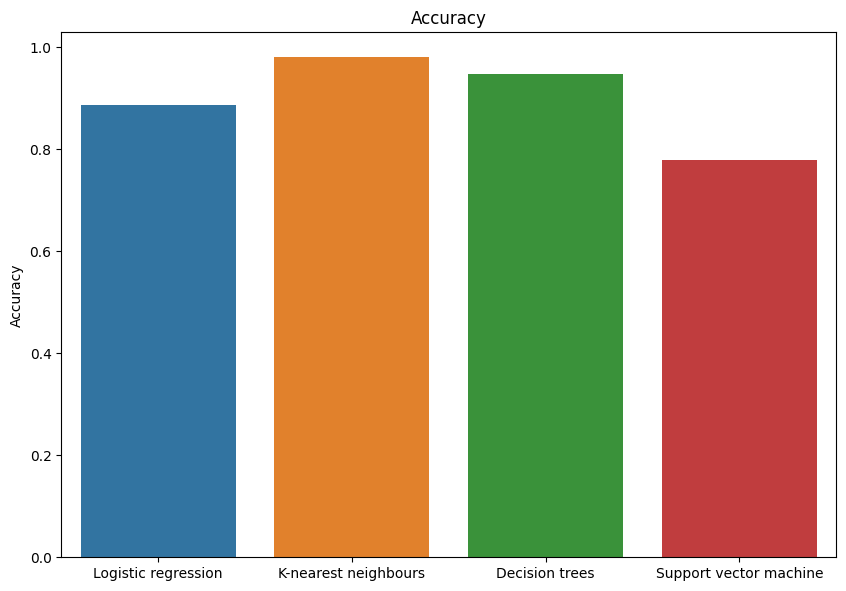

In [ ]:
#visulizing Accuuracy with graph
fig = plt.gcf()
fig.set_size_inches(22, 15)
titles = ['Accuracy']
for title,label in enumerate(comparison.columns):
    plt.subplot(2,2,title+1)
    sns.barplot(x=comparison.index, y = comparison[label], data=comparison)
    plt.xticks(fontsize=10)
    plt.title(titles[title])
plt.show()

Testing

In [ ]:
my_data =pd.read_csv('/content/Telecom_Testing.csv')

In [ ]:
prediction = knn_clf.predict(my_data)

In [ ]:
print('Customer will not churn') if prediction[0] ==0 else print('Customer will churn')

Customer will churn
